# 8K Filing Event Type Classification & Analysis

## 1. Doc Download

In [2]:
import numpy as np
import pandas as pd
from sec_edgar_downloader import Downloader
dl = Downloader('data/')

### Transform and Extract CIK Codes for NYSE Tickers

In [3]:
df = pd.read_csv('cik_ticker.csv', sep='|')

In [4]:
df.head()

,CIK,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0,CA,DE,770518772.0
1,4281,AA,Alcoa Inc,NYSE,3350.0,PA,PA,250317820.0
2,1332552,AAACU,Asia Automotive Acquisition Corp,NaN,6770.0,DE,DE,203022522.0
3,1287145,AABB,Asia Broadband Inc,OTC,8200.0,GA,NV,721569126.0
4,1024015,AABC,Access Anytime Bancorp Inc,NaN,6035.0,NM,DE,850444597.0


In [5]:
df.Exchange = df.Exchange.astype(str)

In [6]:
df.shape

(13737, 8)

In [7]:
df = df[(df['Exchange'] == 'NYSE')]

In [8]:
df.shape

(2880, 8)

In [9]:
df.drop(columns=['Business', 'Incorporated', 'IRS'], inplace=True)

In [10]:
df = df.reset_index(drop=True)

In [11]:
df.head()

,CIK,Ticker,Name,Exchange,SIC
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0
1,4281,AA,Alcoa Inc,NYSE,3350.0
2,706688,AAN,Aarons Inc,NYSE,7359.0
3,1158449,AAP,Advance Auto Parts Inc,NYSE,5531.0
4,1500217,AAT,American Assets Trust Inc,NYSE,6798.0


In [12]:
df.CIK = df.CIK.astype(str)

In [13]:
df['CIK'] = df['CIK'].str.zfill(10)

In [18]:
df.head()

,CIK,Ticker,Name,Exchange,SIC
0,0001090872,A,Agilent Technologies Inc,NYSE,3825.0
1,0000004281,AA,Alcoa Inc,NYSE,3350.0
2,0000706688,AAN,Aarons Inc,NYSE,7359.0
3,0001158449,AAP,Advance Auto Parts Inc,NYSE,5531.0
4,0001500217,AAT,American Assets Trust Inc,NYSE,6798.0


In [19]:
for i in df4.index:
    dl.get("8-K", df4.CIK[i], after_date="20080101", include_amends=True)

HTTPError: 503 Server Error: Service Unavailable for url: https://www.sec.gov/Archives/edgar/data/33213/000115752311006031/0001157523-11-006031.txt

## Text Extraction

In [3]:
## Standard
import os, re, sys, time

## Data handling
import pandas as pd
import numpy as np

## "Web scraping" and HTML
import requests
import lxml.html
from bs4 import BeautifulSoup

import pickle

In [4]:
def extract_text():

    list_of_dicts = []

    directory = r'C:\Users\Hippie Slayer\data_science_stuff\8K-Filing-NLP-Topic-Modelling/data/sec_edgar_filings'

    for subdir, dirs, files in os.walk(directory):
        for file in files:
            try:
                path = r'%s' % (subdir+'\\'+file)
                with open(str(path)) as inp:

                    doc_dict = {}
                    doc = inp.read()
                    doc_date = None
                    doc_item = None
                    doc_body = None
                    summary_index = None

                    soup = BeautifulSoup(doc, 'html.parser')

                    date = soup.find('acceptance-datetime')
                    date_text = 'CONFORMED PERIOD OF REPORT'
                    for line in str(date).splitlines():
                        if date_text in line:
                            doc_date = line[-8:]

                    body = soup.find('document').find('text').find_all('font')
                    pattern = '^[Ii][Tt][Ee][Mm]\s\d*(?=\.)'
                    for index, tag in enumerate(body):
                        word = re.search(pattern, tag.get_text())
                        if word:
                            doc_item = word.group(0)
                            item_index = index
                            summary_index = item_index + 1
                            doc_body = body[summary_index].get_text().strip()
                            if len(doc_body) == 0:
                                summary_index = summary_index + 1
                                doc_body = body[summary_index].get_text().strip()
                            break

                    doc_dict['date'] = doc_date
                    doc_dict['file'] = path[-24:-14]
                    doc_dict['item'] = doc_item
                    doc_dict['body'] = doc_body
                    list_of_dicts.append(doc_dict)
            except:
                print(f"Error occurred with {file}")
            
    return list_of_dicts

In [5]:
test_dict = extract_text()

C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`)R3$,KE$*TW``7[`'
  warnings.warn(msg)


Error occurred with 0001045450-15-000026.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'DUU' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-11-200803.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![1U3G[4W65F_RU_LI_'
  warnings.warn(msg)


Error occurred with 0001193125-11-292806.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'J' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-08-107889.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'P' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-11-212557.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`2&K6+<9ZG46)P\nM?'
  warnings.warn(msg)


Error occurred with 0001193125-13-372124.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Q' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-12-344175.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at "<![07MN%'A9)FFC:N1A("
  warnings.warn(msg)


Error occurred with 0001193125-10-030076.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'G1' in marked section
  warnings.warn(msg)
C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'A' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-11-342323.txt
Error occurred with 0001193125-12-007972.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![7VNZ+T"6S#?>4,#)0'
  warnings.warn(msg)


Error occurred with 0000950123-11-066080.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![^XDBDBM9VC:$2#:S$'
  warnings.warn(msg)


Error occurred with 0001193125-11-352621.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`4444`-)Y[T;OK7D6'
  warnings.warn(msg)


Error occurred with 0001193125-14-083427.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![]2M(;*Y:W#2 F1)$&'
  warnings.warn(msg)


Error occurred with 0001104659-18-037193.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![`+BO`9FM%M^M!$`T?'
  warnings.warn(msg)


Error occurred with 0000950123-11-014063.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![;-CMBN6@K;16N\\"#V'
  warnings.warn(msg)
C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'G' in marked section
  warnings.warn(msg)


Error occurred with 0000950123-11-092549.txt
Error occurred with 0000950123-11-099232.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![[S6N/)FU=P1&-E5IE'
  warnings.warn(msg)


Error occurred with 0001289308-20-000013.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![_!2\\\\B(YRV7X.VFZX'
  warnings.warn(msg)


Error occurred with 0001193125-08-023933.txt
Error occurred with 0001140361-13-031173.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'XB9TU' in marked section
  warnings.warn(msg)


Error occurred with 0001367644-08-000007.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'B' in marked section
  warnings.warn(msg)


Error occurred with 0001367644-08-000085.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'XS7FFIN-9U' in marked section
  warnings.warn(msg)


Error occurred with 0001104659-11-051313.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![6)A=8\\_*_ZS`P,^O`'
  warnings.warn(msg)


Error occurred with 0001104659-11-059613.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'UCZ' in marked section
  warnings.warn(msg)


Error occurred with 0001104659-13-047529.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![7&B\\(W"M;2R"VZ3L3'
  warnings.warn(msg)


Error occurred with 0001193125-10-188943.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![%E8PA2]4`1LG\nMOXD'
  warnings.warn(msg)


Error occurred with 0000950123-10-073341.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'BUEC3' in marked section
  warnings.warn(msg)


Error occurred with 0001437749-13-001240.txt
Error occurred with 0001437749-13-001817.txt
Error occurred with 0001437749-13-002889.txt
Error occurred with 0001437749-13-002953.txt
Error occurred with 0001437749-13-004483.txt
Error occurred with 0001437749-13-009077.txt
Error occurred with 0001104659-19-020690.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Y8E\n' in marked section
  warnings.warn(msg)


Error occurred with 0001104659-20-062912.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'M' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-16-682002.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'E8Z' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-17-037316.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![4R`\\`/>&\\/\nM<>=C9'
  warnings.warn(msg)


Error occurred with 0000031978-12-000041.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'FD' in marked section
  warnings.warn(msg)


Error occurred with 0000031978-14-000016.txt
Error occurred with 0000031978-14-000026.txt
Error occurred with 0000031978-14-000040.txt
Error occurred with 0000031978-15-000017.txt
Error occurred with 0000031978-15-000029.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'FD ' in marked section
  warnings.warn(msg)


Error occurred with 0000031978-16-000066.txt
Error occurred with 0000031978-16-000086.txt
Error occurred with 0000031978-16-000092.txt
Error occurred with 0000031978-16-000101.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'F' in marked section
  warnings.warn(msg)


Error occurred with 0001144204-12-025137.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![8!YYC0`#D<0[Z=(EA'
  warnings.warn(msg)


Error occurred with 0001104659-14-039865.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![!.#1*0SG8&-XBP"#;'
  warnings.warn(msg)


Error occurred with 0001104659-16-145354.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![)L?OS@,,%8WT>MF?9'
  warnings.warn(msg)


Error occurred with 0000821189-10-000004.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'I' in marked section
  warnings.warn(msg)


Error occurred with 0000837465-18-000012.txt
Error occurred with 0000837465-18-000026.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![,/\\ &F?$O1_AC=W&\n'
  warnings.warn(msg)


Error occurred with 0001193125-17-247711.txt
Error occurred with 0001193125-10-208579.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![:][O:S>[\\])3G](QL'
  warnings.warn(msg)


Error occurred with 0001193125-11-328998.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at '<![6_P!7\nM]]8OU8L/KX'
  warnings.warn(msg)


Error occurred with 0001193125-12-383366.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'N' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-13-158578.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: expected name token at "<![57G'7;*3KJ'6[&K8V"
  warnings.warn(msg)


Error occurred with 0000895417-17-000006.txt
Error occurred with 0000895417-17-000068.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Z' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-13-075860.txt
Error occurred with 0001193125-13-088850.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'M\n' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-13-438462.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'C7' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-14-114579.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'U' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-18-061118.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'Z058' in marked section
  warnings.warn(msg)


Error occurred with 0001193125-19-076730.txt


C:\Users\Hippie Slayer\Anaconda3\lib\site-packages\bs4\builder\_htmlparser.py:78: UserWarning: unknown status keyword 'KUMT' in marked section
  warnings.warn(msg)


Error occurred with 0000915389-20-000029.txt


In [3]:
df_8k = pd.DataFrame(test_dict)

NameError: name 'pd' is not defined

In [8]:
df_8k.tail(50)

,date,file,item,body
7527,20141110,0001193125,None,None
7528,20141120,0001193125,None,None
7529,20141205,0001193125,None,None
7530,20160519,0001193125,None,None
7531,20160526,0001193125,None,None
7532,20161031,0001193125,None,None
7533,20161116,0001193125,None,None
7534,20161121,0001193125,None,None
7535,20181030,0001193125,None,None
7536,20181030,0001193125,None,None


In [9]:
df_8k.shape

(7577, 4)

## Clean Dataframe & Tokenize Text

In [19]:
import pandas as pd
import numpy as np
import re
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df_8k['date'] =  pd.to_datetime(df_8k['date'], format='%Y%m%d')
df_8k.head()

,date,file,item,body
0,2010-05-26,0000950130,Item 3,Notice of Delisting or Failure to Satisfy a Co...
1,2003-01-31,0001001171,None,None
2,2003-05-01,0001001171,None,None
3,2003-06-30,0001001171,None,None
4,2003-09-30,0001001171,None,None


In [24]:
df_8k.dropna(inplace=True)

In [25]:
df_8k.shape

(76388, 4)

In [26]:
df_8k.item = df_8k.item.apply(lambda x: re.sub('\\n', ' ', x))

In [27]:
df_8k.item = df_8k.item.apply(lambda x: x[5:])

In [28]:
df_8k.reset_index(inplace=True)

In [29]:
df_8k.item.value_counts()

2     23451
5     16632
8     11031
7     10666
1     10531
9      2044
3      1109
4       588
12      316
11       12
6         3
08        3
10        2
Name: item, dtype: int64

In [42]:
for i in df_8k.index:
    if len(df_8k['body'][i]) < 200:
        df_8k.drop(index=i, inplace=True)
df_8k.shape

(29228, 5)

In [43]:
df_8k.head()

,index,date,file,item,body
6,14,2013-10-30,0001104659,8,"On October 30, 2013, Broadway Federal Bank, f...."
8,16,2013-11-15,0001104659,8,"On November 18, 2013, Broadway Financial Corpo..."
10,18,2014-02-28,0001104659,8,"On March 4, 2014, the Company issued a press r..."
19,27,2014-09-24,0001104659,8,"On September 24, 2014, Broadway Financial Corp..."
27,35,2015-05-08,0001104659,2,"On May 8, 2015, Broadway Financial Corporation..."


In [44]:
with open('fin_stopwords.txt') as txt:
    fin_stopwords = txt.read().splitlines()
fin_stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [45]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

def spacy_tokenizer(text):
    
    # Create our list of punctuation marks
    punctuations = string.punctuation

    # Create our list of stopwords
    nlp = spacy.load('en_core_web_sm')
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Adding words to remove in addition to stopwords
    add_stopwords = fin_stopwords
    
    # remove numbers and special characters
    pattern = '[0-9]'
    cleantext = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    cleantext2 = re.sub(pattern, '', cleantext)
    
    # remove html tags
    html = re.compile('<.*?>')
    cleantext3 = re.sub(html, '', cleantext2)
    
    # Creating token object
    doc = nlp(cleantext3)

    entity_list = []
    for token in list(doc.ents):
        entities = str(token).split(' ')
        for word in entities:
            entity_list.append(word)
    tokens = [word for word in doc if word.text not in entity_list]

    # Lemmatizing each token and converting each token into lowercase
    tokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens ]

    # Removing stop words
    tokens = [ word for word in tokens if word not in stop_words and word not in punctuations ]
    
    # Removing custom set of terms
    tokens = [ word for word in tokens if word not in add_stopwords ]

    # remove words with less than 3 characters
    tokens = [ word for word in tokens if len(word) > 2 ]

    # return preprocessed list of tokens
    return tokens

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [2]:
cv = CountVectorizer(tokenizer=spacy_tokenizer, max_df=0.7, min_df=0.02, ngram_range = (2,3), stop_words='english')

NameError: name 'spacy_tokenizer' is not defined

In [48]:
dtm = cv.fit_transform(df_8k['body'])

In [50]:
from sklearn.decomposition import LatentDirichletAllocation

In [114]:
# Build LDA Model with GridSearch params
lda_model = LatentDirichletAllocation(n_components=20,            # Number of topics
                                      learning_decay=0.5,         
                                      max_iter=50,                # Max learning iterations
                                      learning_method='online',   
                                      random_state=42,            # Random state
                                      batch_size=5000,            # n docs in each learning iter
                                      evaluate_every = -1,        # compute perplexity every n iters, default: Don't
                                      n_jobs = -1)                # Use all available CPU

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=5000, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [115]:
lda_output = lda_model.fit_transform(dtm)

In [116]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(dtm))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(dtm))

# See model parameters
print(lda_model.get_params())

Log Likelihood:  -2694822.665297287
Perplexity:  70.39901979788179
{'batch_size': 5000, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.5, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 50, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


## GridSearch to Identify Best Model Params

In [111]:
from sklearn.model_selection import GridSearchCV


# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30],'learning_decay': [.5, .7]}

# Init the Model
lda = LatentDirichletAllocation(max_iter=25, batch_size=5000, learning_method='online')

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, cv=3, verbose=2, n_jobs = -1)

# Do the Grid Search
model.fit(dtm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 30.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=5000,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='online',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=25,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total

In [112]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(dtm))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 20}
Best Log Likelihood Score:  -907280.8743475805
Model Perplexity:  69.09605222244672


In [ ]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [15, 20, 25]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.5]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

## Explore Topic Modeling Outputs

In [59]:
lda_model.components_

array([[1.32500317e+02, 1.00087880e-01, 4.46281560e+02, ...,
        1.00005521e-01, 1.48593308e-01, 2.82127143e-01],
       [1.01251874e-01, 1.01044464e-01, 1.02177670e-01, ...,
        8.26003793e+01, 1.00711144e-01, 1.00239798e-01],
       [1.00265132e-01, 1.01098569e-01, 1.23402348e-01, ...,
        9.92236331e+02, 1.00092944e-01, 1.00065617e-01],
       ...,
       [1.00149672e-01, 1.00168714e-01, 3.52486117e+01, ...,
        1.00469912e-01, 1.00163830e-01, 1.02387754e-01],
       [1.05071252e+02, 3.21707866e+02, 8.33397824e+01, ...,
        1.00272691e-01, 1.00041781e-01, 1.00103911e-01],
       [6.31440541e+01, 1.00025565e-01, 5.18238756e+02, ...,
        1.00065291e-01, 8.90177500e+02, 9.43286264e+02]])

In [118]:
# Number of words/tokens in first topic
len(lda_model.components_[0])

210

In [119]:
single_topic = lda_model.components_[0]

In [120]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([ 42, 141, 207, 196,  73, 101, 119, 171, 205,  62,  15, 116, 120,
         7,  81, 150,  75, 139,  95,  35,  16, 107,  48,  51, 142, 136,
       152, 146,  30, 208, 128,   1, 114,  56,  89, 143, 195, 209, 204,
        58, 182,  94,  77, 167, 188,  78, 127, 132,  39, 206, 115,  69,
       183,  22, 140, 158, 100, 125, 159,  74, 173, 199,  57, 184,  21,
       103,  61, 111,  53,  82, 164, 194,  65,  49,  29,  19, 190,  86,
        20,  13,  63,  28, 112,  45, 160,   3,  24,  85, 113,  70, 155,
       169,  80,  54, 126, 105, 178,  76, 162, 108,  17,  92, 135, 138,
       166, 134,  27, 200,  55, 198,  23,  11, 102, 192, 123,  79,  18,
       165,  10, 133, 187,  46,  64,  91,  66, 172, 104,  68, 121,  93,
        84,  60,  12, 179, 118,  97,  71,  40, 185,  44, 109, 177, 168,
        34, 174,   5,  72,  52,  90,   2, 161, 106,  25,  87, 151, 170,
        96,  88,   8, 147, 197,   0, 189, 137,  59,   4,  14, 163,  98,
       144,  41,  31,  32,  67, 193, 117,  26, 202,  47,  43, 17

In [121]:
# Word least representative of this topic
single_topic[42]

0.05000000000889091

In [122]:
# Word most representative of this topic
single_topic[186]

8506.332378372475

In [123]:
# Top 10 words for this topic:
single_topic.argsort()[-10:]

array([154, 110,  38, 124, 129, 145,  37,  36, 191, 186], dtype=int64)

In [124]:
top_word_indices = single_topic.argsort()[-10:]

In [125]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

purchase
market
companys
offering
option
price
company
common
stock
share


In [126]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['additional', 'time', 'par', 'issue', 'outstanding', 'purchase', 'market', 'companys', 'offering', 'option', 'price', 'company', 'common', 'stock', 'share']


THE TOP 15 WORDS FOR TOPIC #1
['herewith', 'attach', 'current', 'form', 'company', 'copy', 'announce', 'furnish', 'report', 'financial', 'exhibit', 'issue', 'result', 'press', 'release']


THE TOP 15 WORDS FOR TOPIC #2
['period', 'update', 'condition', 'item', 'sale', 'report', 'end', 'provide', 'statement', 'business', 'operation', 'include', 'result', 'financial', 'information']


THE TOP 15 WORDS FOR TOPIC #3
['matter', 'result', 'follow', 'public', 'approve', 'statement', 'proposal', 'company', 'proxy', 'companys', 'hold', 'shareholder', 'vote', 'stockholder', 'meeting']


THE TOP 15 WORDS FOR TOPIC #4
['march', 'pursuant', 'announce', 'set', 'amend', 'addition', 'extend', 'limited', 'time', 'date', 'class', 'exchange', 'supplemental', 'supplement', 'offer']


THE TOP 15 WORDS FOR TOPIC #5
['inc

In [127]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(dtm)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [128]:
df_document_topic.shape

(29228, 21)

In [129]:
df.shape

(29228, 4)

In [130]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,1,4273
1,15,2811
2,7,2788
3,11,1992
4,10,1728
5,0,1685
6,6,1569
7,3,1535
8,14,1457
9,13,1423


In [131]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, dtm, cv, mds='tsne')
panel

C:\Users\nqabe\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
1      -10.878068   10.538728       1        1  9.986208
7      -60.884026  -75.591820       2        1  8.371724
11      -2.336119  -53.289074       3        1  7.242692
0      -61.385319  -12.914634       4        1  7.054908
15     -28.737743  126.296997       5        1  6.456378
14       1.066606 -123.552811       6        1  6.106288
9       45.140720   -7.947869       7        1  5.683007
10    -140.795975  -98.530548       8        1  5.395791
5       61.531681  -83.240562       9        1  4.934743
3      -72.563057 -140.396881      10        1  4.730486
17      15.984491   63.578186      11        1  4.540053
6     -160.851624   68.945145      12        1  4.534047
19      85.961830   51.922935      13        1  4.431402
2      -99.020836  109.936348      14        1  3.970779
13    -176.764130   -8.681684      15        1  3.801689
12    -117.189880  -37.420200      16        1  3.223808
18     108.829918  -22.946203      17        1  3.162120
8       47.588097  121.934814      18        1  2.951833
16    -106.467834   30.176889      19        1  2.303559
4      -50.613804   59.328842      20        1  1.118486, topic_info=    Category          Freq         Term         Total  loglift  logprob
167  Default  22509.000000      release  22509.000000  30.0000  30.0000
143  Default  19584.000000        press  19584.000000  29.0000  29.0000
11   Default  16217.000000    agreement  16217.000000  28.0000  28.0000
186  Default   9653.000000        share   9653.000000  27.0000  27.0000
80   Default   9141.000000         form   9141.000000  26.0000  26.0000
..       ...           ...          ...           ...      ...      ...
14   Topic20    116.593761     announce  11799.787036  -0.1239  -4.1071
130  Topic20     19.287614  outstanding   2005.261515  -0.1509  -5.9063
99   Topic20     95.778480        issue  12455.503925  -0.3747  -4.3037
27   Topic20     15.661217         cash   2489.843093  -0.5756  -6.1146
172  Topic20      5.707413      respect   1096.901874  -0.7653  -7.1240

[731 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.276098  accordance
0         4  0.132936  accordance
0         7  0.022724  accordance
0        11  0.192019  accordance
0        12  0.094305  accordance
...     ...       ...         ...
207      15  0.931002     website
207      20  0.068322     website
208      16  0.999223      wholly
209       7  0.000989  whollyowne
209      16  0.998588  whollyowne

[1214 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 12, 1, 16, 15, 10, 11, 6, 4, 18, 7, 20, 3, 14, 13, 19, 9, 17, 5])

In [133]:
# Show top n keywords for each topic
def show_topics(vectorizer=cv, lda_model=lda_model, n_words=10):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=cv, lda_model=lda_model, n_words=10)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9
Topic 0,share,stock,common,company,price,option,offering,companys,market,purchase
Topic 1,release,press,result,issue,exhibit,financial,report,furnish,announce,copy
Topic 2,information,financial,result,include,operation,business,statement,provide,end,report
Topic 3,meeting,stockholder,vote,shareholder,hold,companys,proxy,company,proposal,statement
Topic 4,offer,supplement,supplemental,exchange,class,date,time,limited,extend,addition
Topic 5,form,report,file,current,statement,company,registration,companys,exhibit,include
Topic 6,director,board,company,effective,serve,committee,member,appoint,elect,companys
Topic 7,reference,incorporate,release,exhibit,press,attach,copy,announce,issue,result
Topic 8,registrant,company,expect,relate,announce,result,previously,development,disclose,net
Topic 9,agreement,purchase,company,enter,sale,transaction,asset,acquisition,agree,acquire


In [104]:
df.reset_index(drop=True, inplace=True)
df.drop(columns='index', inplace=True)
df.head()

,date,file,item,body
0,2013-10-30,0001104659,8,"On October 30, 2013, Broadway Federal Bank, f...."
1,2013-11-15,0001104659,8,"On November 18, 2013, Broadway Financial Corpo..."
2,2014-02-28,0001104659,8,"On March 4, 2014, the Company issued a press r..."
3,2014-09-24,0001104659,8,"On September 24, 2014, Broadway Financial Corp..."
4,2015-05-08,0001104659,2,"On May 8, 2015, Broadway Financial Corporation..."


In [ ]:
# df['tokens'] = df['body'].apply(spacy_tokenizer)
# df.head()

In [134]:
df_topics = df_document_topic.reset_index(drop=True)
df_topics.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
0,0.0,0.00,0.0,0.0,0.00,0.15,0.0,0.0,0.0,0.00,...,0.0,0.32,0.0,0.00,0.30,0.0,0.18,0.00,0.0,12
1,0.0,0.00,0.0,0.0,0.06,0.13,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.69,0.0,0.07,0.00,0.0,15
2,0.0,0.00,0.0,0.2,0.08,0.07,0.0,0.0,0.0,0.13,...,0.0,0.00,0.0,0.05,0.26,0.0,0.00,0.18,0.0,15
3,0.0,0.33,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.29,0.0,0.00,0.00,0.0,1
4,0.0,0.38,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.56,0.0,0.00,0.00,0.0,15


In [135]:
df_combined = pd.merge(df, df_topics, left_index=True, right_index=True)

In [136]:
df_combined.head()

,date,file,item,body,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,...,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
0,2013-10-30,0001104659,8,"On October 30, 2013, Broadway Federal Bank, f....",0.0,0.00,0.0,0.0,0.00,0.15,...,0.0,0.32,0.0,0.00,0.30,0.0,0.18,0.00,0.0,12
1,2013-11-15,0001104659,8,"On November 18, 2013, Broadway Financial Corpo...",0.0,0.00,0.0,0.0,0.06,0.13,...,0.0,0.00,0.0,0.00,0.69,0.0,0.07,0.00,0.0,15
2,2014-02-28,0001104659,8,"On March 4, 2014, the Company issued a press r...",0.0,0.00,0.0,0.2,0.08,0.07,...,0.0,0.00,0.0,0.05,0.26,0.0,0.00,0.18,0.0,15
3,2014-09-24,0001104659,8,"On September 24, 2014, Broadway Financial Corp...",0.0,0.33,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.00,0.29,0.0,0.00,0.00,0.0,1
4,2015-05-08,0001104659,2,"On May 8, 2015, Broadway Financial Corporation...",0.0,0.38,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.00,0.56,0.0,0.00,0.00,0.0,15


In [163]:
topic_names_list = list(df_combined.columns[4:-1])

In [155]:
topic_numbers = {0:'Stock Issuance', 1:'Annual Fin-Results', 2:'Operations Event', 3:'Annual Shareholder Meeting', 4:'Debt Event', 5:'Financial Reporting Event',
                 6:'Board Member Appointment', 7:'Quarterly Fin-Results', 8:'Change in Operations', 9:'Sale of Assets', 10:'Senior Personnel Change', 
                 11:'Information Disclosure', 12:'Joint Venture and Merger Events', 13:'Conference and Presentation', 14:'Credit Agreement',
                 15:'Press Release Other', 16:'Dividend Event', 17:'Lease and Service Agreement', 18:'Note Issuance', 19:'Senior Executive Compensation'}

In [148]:
df_combined.rename(columns=topic_names, inplace=True)

In [154]:
df_combined.dominant_topic.astype(int)

0        12
1        15
2        15
3         1
4        15
         ..
29223    14
29224     3
29225    10
29226     7
29227    14
Name: dominant_topic, Length: 29228, dtype: int32

In [156]:
df_combined['dominant_topic'] = [topic_numbers[number] for number in df_combined.dominant_topic]

In [159]:
df_combined.sort_values('date')

,date,file,item,body,Stock Issuance,Annaul Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,...,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,dominant_topic
19176,2002-04-03,0000891020,9,In accordance with General Instruction B.2 of ...,0.00,0.00,0.00,0.00,0.0,0.10,...,0.87,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,Information Disclosure
13160,2002-04-27,0001483096,8,"On April 27, 2012, Chesapeake Midstream Partne...",0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.15,0.0,0.00,0.48,0.33,0.00,0.0,0.00,Press Release Other
28433,2002-05-14,0000950135,5,"On May 14, 2002, Brooks Automation, Inc. (“Bro...",0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.15,0.00,0.26,0.00,0.0,0.00,Change in Operations
7977,2002-06-15,0000950133,5,This Form 8-K 12g-3/A is being filed to correc...,0.00,0.00,0.00,0.09,0.0,0.21,...,0.38,0.16,0.0,0.00,0.00,0.00,0.00,0.0,0.04,Information Disclosure
7978,2002-06-15,0000950133,5,"Effective June 15, 2002, pursuant to an Agreem...",0.36,0.00,0.00,0.08,0.0,0.00,...,0.12,0.20,0.0,0.00,0.00,0.00,0.00,0.0,0.04,Stock Issuance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12138,2020-03-12,0001558370,7,"On March 12, 2020, APLP Holdings Limited Part...",0.00,0.00,0.31,0.00,0.0,0.00,...,0.42,0.10,0.0,0.15,0.00,0.00,0.00,0.0,0.00,Information Disclosure
9867,2020-03-12,0001305323,5,"On March 12, 2020, Zovio Inc (the “Company”) t...",0.00,0.00,0.00,0.00,0.0,0.30,...,0.00,0.00,0.0,0.00,0.00,0.00,0.23,0.0,0.00,Senior Personnel Change
24440,2020-03-12,0000884144,2,"On March 12, 2020, Asure Software, Inc. (the “...",0.00,0.94,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,Annaul Fin-Results
16345,2020-03-13,0000003545,8,"On March 13, 2020, the Board of Directors of A...",0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.0,0.00,0.00,0.93,0.00,0.0,0.00,Dividend Event


In [164]:
df_combined.to_pickle('df_combined.pkl')

## Visualizing Topic Cluster Results & Attributing Labels

In [141]:
def top_5_per_topic(topic=0):
    
    topic_name = 'Topic{}'.format(topic)
    
    print(topic_name)
    
    for i in df_combined[df_combined['dominant_topic'] == topic].sort_values(topic_name, ascending=False).head().index:
        print(df_combined[df_combined['dominant_topic'] == topic].sort_values(topic_name, ascending=False).head().body[i]+'\n\n')

In [142]:
for i in range(0,20):
    top_5_per_topic(i)

Topic0
On March 9, 2004, Antares Pharma, Inc. (the “Company”) completed a third and final
closing of a private placement of its common stock and warrants to several investors. In this third closing, the Company sold an additional 480,050 shares of its common stock, par value $.01 per share, for an aggregate purchase price of $480,050.
The Company also issued to the investors five-year warrants (the “Warrants”) to purchase an aggregate of 160,014 shares of the Company’s common stock at an exercise price of $1.25 per share. In the three closings, the Company sold an
aggregate of 15,120,000 shares of common stock, issued warrants to purchase an aggregate of 5,039,994 shares of common stock and received total aggregate proceeds of $15,120,000. The Company granted the investors customary demand and piggyback
registration rights with respect to the shares of its common stock issued and that are issuable upon exercise of the Warrants.


On February 20, 2004, Antares Pharma, Inc. (the “Company

In [4]:
df.head()

,date,file,item,body,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,...,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,dominant_topic
0,2013-10-30,0001104659,8,"On October 30, 2013, Broadway Federal Bank, f....",0.0,0.00,0.0,0.0,0.00,0.15,...,0.0,0.32,0.0,0.00,0.30,0.0,0.18,0.00,0.0,Joint Venture and Merger Events
1,2013-11-15,0001104659,8,"On November 18, 2013, Broadway Financial Corpo...",0.0,0.00,0.0,0.0,0.06,0.13,...,0.0,0.00,0.0,0.00,0.69,0.0,0.07,0.00,0.0,Press Release Other
2,2014-02-28,0001104659,8,"On March 4, 2014, the Company issued a press r...",0.0,0.00,0.0,0.2,0.08,0.07,...,0.0,0.00,0.0,0.05,0.26,0.0,0.00,0.18,0.0,Press Release Other
3,2014-09-24,0001104659,8,"On September 24, 2014, Broadway Financial Corp...",0.0,0.33,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.00,0.29,0.0,0.00,0.00,0.0,Annaul Fin-Results
4,2015-05-08,0001104659,2,"On May 8, 2015, Broadway Financial Corporation...",0.0,0.38,0.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.00,0.56,0.0,0.00,0.00,0.0,Press Release Other


In [18]:
df.dominant_topic.value_counts()

Annaul Fin-Results                 4273
Press Release Other                2811
Quarterly Fin-Results              2788
Information Disclosure             1992
Senior Personnel Change            1728
Stock Issuance                     1685
Board Member Apointment            1569
Annual Shareholder Meeting         1535
Credit Agreement                   1457
Conference and Presentation        1423
Sale of Assets                     1382
Lease and Service Agreement        1072
Senior Executive Compensation      1061
Note Issuance                       826
Operations Event                    792
Joint Venture and Merger Events     775
Financial Reporting Event           746
Change in Operations                705
Dividend Event                      551
Debt Event                           57
Name: dominant_topic, dtype: int64

In [19]:
df.shape

(29228, 25)

In [5]:
df['doc_number'] = df.index
df.set_index(pd.to_datetime(df['date']), inplace=True)
df.drop(columns='date', inplace=True)
df.head()

,file,item,body,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,...,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,dominant_topic,doc_number
date,,,,,,,,,,,,,,,,,,,,,
2013-10-30,0001104659,8,"On October 30, 2013, Broadway Federal Bank, f....",0.0,0.00,0.0,0.0,0.00,0.15,0.0,...,0.32,0.0,0.00,0.30,0.0,0.18,0.00,0.0,Joint Venture and Merger Events,0
2013-11-15,0001104659,8,"On November 18, 2013, Broadway Financial Corpo...",0.0,0.00,0.0,0.0,0.06,0.13,0.0,...,0.00,0.0,0.00,0.69,0.0,0.07,0.00,0.0,Press Release Other,1
2014-02-28,0001104659,8,"On March 4, 2014, the Company issued a press r...",0.0,0.00,0.0,0.2,0.08,0.07,0.0,...,0.00,0.0,0.05,0.26,0.0,0.00,0.18,0.0,Press Release Other,2
2014-09-24,0001104659,8,"On September 24, 2014, Broadway Financial Corp...",0.0,0.33,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.29,0.0,0.00,0.00,0.0,Annaul Fin-Results,3
2015-05-08,0001104659,2,"On May 8, 2015, Broadway Financial Corporation...",0.0,0.38,0.0,0.0,0.00,0.00,0.0,...,0.00,0.0,0.00,0.56,0.0,0.00,0.00,0.0,Press Release Other,4


In [6]:
topic_columns = list(df.columns[3:-2])
df_topics = df[topic_columns]
df_topics_aggyear = df_topics.groupby(pd.Grouper(freq='Y')).sum()
df_topics_aggyear

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,Senior Personnel Change,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation
date,,,,,,,,,,,,,,,,,,,,
2002-12-31,0.39,0.00,0.32,0.34,0.00,1.02,0.77,0.00,0.52,1.00,0.00,1.37,0.72,0.00,0.78,0.48,0.59,0.29,0.00,0.08
2003-12-31,50.37,71.60,39.75,5.76,5.43,38.31,14.92,64.30,33.61,37.42,19.99,34.11,20.41,16.86,18.27,95.13,20.86,15.66,27.29,11.40
2004-12-31,63.53,133.47,53.88,13.55,9.92,51.70,43.83,135.37,45.25,76.02,48.66,70.09,29.84,25.66,44.81,175.67,22.26,38.95,32.38,25.27
2005-12-31,91.88,215.83,66.08,38.74,19.00,95.60,100.81,200.20,77.58,89.03,99.63,117.12,54.91,49.08,90.79,169.75,31.78,107.10,52.20,99.60
2006-12-31,87.24,231.11,65.37,38.70,17.42,89.04,105.89,214.22,70.07,91.02,98.11,135.91,54.30,58.17,89.82,165.52,34.15,92.19,37.19,103.21
2007-12-31,84.59,197.25,44.82,23.13,12.29,58.45,89.05,157.55,58.29,59.76,96.78,92.76,36.87,49.03,63.01,126.39,24.75,57.34,18.55,52.61
2008-12-31,74.37,218.61,48.52,43.34,11.89,59.25,79.16,167.87,62.24,72.83,75.35,84.01,43.90,53.77,82.73,116.54,29.69,66.24,26.80,52.33
2009-12-31,85.23,242.67,69.94,31.70,18.37,69.66,75.29,180.91,62.36,56.59,72.73,79.91,54.53,74.54,70.83,132.25,26.94,66.36,37.60,50.82
2010-12-31,94.14,279.83,64.11,91.35,19.60,69.05,89.47,185.93,53.35,83.96,91.15,110.74,94.73,79.57,75.90,137.01,31.55,71.28,44.92,53.05


In [7]:
df_topics_aggyear.drop(pd.to_datetime('2002-12-31'), inplace=True)
df_topics_aggyear.drop(pd.to_datetime('2020-12-31'), inplace=True)
df_topics_aggyear

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,Senior Personnel Change,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation
date,,,,,,,,,,,,,,,,,,,,
2003-12-31,50.37,71.60,39.75,5.76,5.43,38.31,14.92,64.30,33.61,37.42,19.99,34.11,20.41,16.86,18.27,95.13,20.86,15.66,27.29,11.40
2004-12-31,63.53,133.47,53.88,13.55,9.92,51.70,43.83,135.37,45.25,76.02,48.66,70.09,29.84,25.66,44.81,175.67,22.26,38.95,32.38,25.27
2005-12-31,91.88,215.83,66.08,38.74,19.00,95.60,100.81,200.20,77.58,89.03,99.63,117.12,54.91,49.08,90.79,169.75,31.78,107.10,52.20,99.60
2006-12-31,87.24,231.11,65.37,38.70,17.42,89.04,105.89,214.22,70.07,91.02,98.11,135.91,54.30,58.17,89.82,165.52,34.15,92.19,37.19,103.21
2007-12-31,84.59,197.25,44.82,23.13,12.29,58.45,89.05,157.55,58.29,59.76,96.78,92.76,36.87,49.03,63.01,126.39,24.75,57.34,18.55,52.61
2008-12-31,74.37,218.61,48.52,43.34,11.89,59.25,79.16,167.87,62.24,72.83,75.35,84.01,43.90,53.77,82.73,116.54,29.69,66.24,26.80,52.33
2009-12-31,85.23,242.67,69.94,31.70,18.37,69.66,75.29,180.91,62.36,56.59,72.73,79.91,54.53,74.54,70.83,132.25,26.94,66.36,37.60,50.82
2010-12-31,94.14,279.83,64.11,91.35,19.60,69.05,89.47,185.93,53.35,83.96,91.15,110.74,94.73,79.57,75.90,137.01,31.55,71.28,44.92,53.05
2011-12-31,112.28,362.48,82.32,182.10,16.59,112.84,135.09,258.55,71.47,102.92,130.50,144.71,86.19,97.52,120.93,195.39,50.90,85.61,42.11,91.45


In [8]:
df_topics_aggyear['year'] = df_topics_aggyear.index.year
df_topics_aggyear

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,...,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation,year
date,,,,,,,,,,,,,,,,,,,,,
2003-12-31,50.37,71.60,39.75,5.76,5.43,38.31,14.92,64.30,33.61,37.42,...,34.11,20.41,16.86,18.27,95.13,20.86,15.66,27.29,11.40,2003
2004-12-31,63.53,133.47,53.88,13.55,9.92,51.70,43.83,135.37,45.25,76.02,...,70.09,29.84,25.66,44.81,175.67,22.26,38.95,32.38,25.27,2004
2005-12-31,91.88,215.83,66.08,38.74,19.00,95.60,100.81,200.20,77.58,89.03,...,117.12,54.91,49.08,90.79,169.75,31.78,107.10,52.20,99.60,2005
2006-12-31,87.24,231.11,65.37,38.70,17.42,89.04,105.89,214.22,70.07,91.02,...,135.91,54.30,58.17,89.82,165.52,34.15,92.19,37.19,103.21,2006
2007-12-31,84.59,197.25,44.82,23.13,12.29,58.45,89.05,157.55,58.29,59.76,...,92.76,36.87,49.03,63.01,126.39,24.75,57.34,18.55,52.61,2007
2008-12-31,74.37,218.61,48.52,43.34,11.89,59.25,79.16,167.87,62.24,72.83,...,84.01,43.90,53.77,82.73,116.54,29.69,66.24,26.80,52.33,2008
2009-12-31,85.23,242.67,69.94,31.70,18.37,69.66,75.29,180.91,62.36,56.59,...,79.91,54.53,74.54,70.83,132.25,26.94,66.36,37.60,50.82,2009
2010-12-31,94.14,279.83,64.11,91.35,19.60,69.05,89.47,185.93,53.35,83.96,...,110.74,94.73,79.57,75.90,137.01,31.55,71.28,44.92,53.05,2010
2011-12-31,112.28,362.48,82.32,182.10,16.59,112.84,135.09,258.55,71.47,102.92,...,144.71,86.19,97.52,120.93,195.39,50.90,85.61,42.11,91.45,2011


In [9]:
df_topics_aggmonth = df_topics.groupby(pd.Grouper(freq='M')).sum()
df_topics_aggmonth

,Stock Issuance,Annual Fin-Results,Operations Event,Annual Shareholder Meeting,Debt Event,Financial Reporting Event,Board Member Appointment,Quarterly Fin-Results,Change in Operations,Sale of Assets,Senior Personnel Change,Information Disclosure,Joint Venture and Merger Events,Conference and Presentation,Credit Agreement,Press Release Other,Dividend Event,Lease and Service Agreement,Note Issuance,Senior Executive Compensation
date,,,,,,,,,,,,,,,,,,,,
2002-04-30,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.87,0.15,0.00,0.00,0.48,0.33,0.00,0.00,0.00
2002-05-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.23,0.00,0.00,0.00,0.00,0.15,0.00,0.26,0.00,0.00,0.00
2002-06-30,0.36,0.00,0.00,0.17,0.00,0.21,0.00,0.00,0.22,0.07,0.00,0.50,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.08
2002-07-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2002-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,5.09,7.74,1.26,2.51,0.15,2.15,3.53,2.45,1.08,1.45,0.87,1.40,1.04,1.47,1.98,1.67,1.47,1.51,1.08,0.68
2019-12-31,2.78,0.03,1.23,3.22,0.09,1.45,3.54,0.79,0.85,1.97,1.85,0.42,1.09,2.43,2.41,1.99,0.96,0.94,0.81,1.21
2020-01-31,1.97,2.77,0.60,0.49,0.27,1.45,0.80,2.18,1.26,1.09,3.27,0.81,1.03,2.01,2.34,2.66,1.56,1.13,0.32,1.72


In [10]:
topic_columns

['Stock Issuance',
 'Annual Fin-Results',
 'Operations Event',
 'Annual Shareholder Meeting',
 'Debt Event',
 'Financial Reporting Event',
 'Board Member Appointment',
 'Quarterly Fin-Results',
 'Change in Operations',
 'Sale of Assets',
 'Senior Personnel Change',
 'Information Disclosure',
 'Joint Venture and Merger Events',
 'Conference and Presentation',
 'Credit Agreement',
 'Press Release Other',
 'Dividend Event',
 'Lease and Service Agreement',
 'Note Issuance',
 'Senior Executive Compensation']

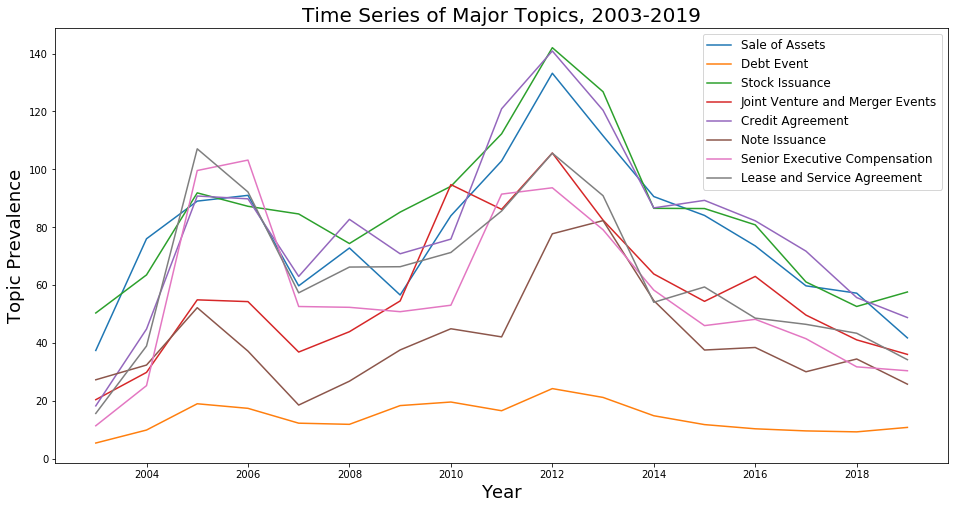

In [11]:
topics = ['Sale of Assets', 'Debt Event', 'Stock Issuance', 'Joint Venture and Merger Events',
          'Credit Agreement', 'Note Issuance', 'Senior Executive Compensation', 'Lease and Service Agreement']
fig, ax = plt.subplots(figsize = (16,8))
for topic in topics:
    x = df_topics_aggyear['year']
    y = df_topics_aggyear[topic]
    ax.plot(x, y, label=topic)
ax.legend(fontsize=12)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Topic Prevalence', fontsize=18)
plt.title('Time Series of Major Topics, 2003-2019', fontsize=20)
plt.show()

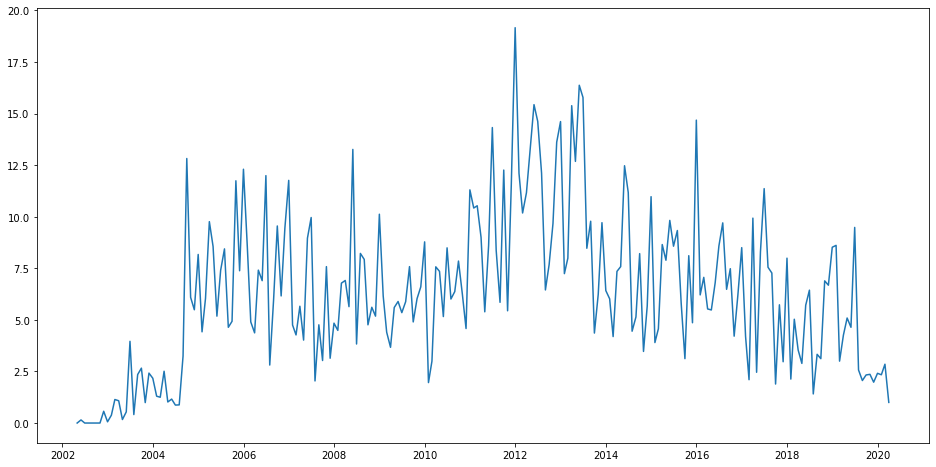

In [13]:
topics2 = ['Credit Agreement']
fig, ax = plt.subplots(figsize = (16,8))
for topic in topics2:
    x = df_topics_aggmonth.index
    y = df_topics_aggmonth[topic]
    ax.plot(x, y, label=topic)
# ax.legend(fontsize=12)
# plt.xlabel('Year', fontsize=18)
# plt.ylabel('Topic Prevalence', fontsize=18)
# plt.title('Time Series of Borrowing Events, 2003-2019', fontsize=20)
plt.show()

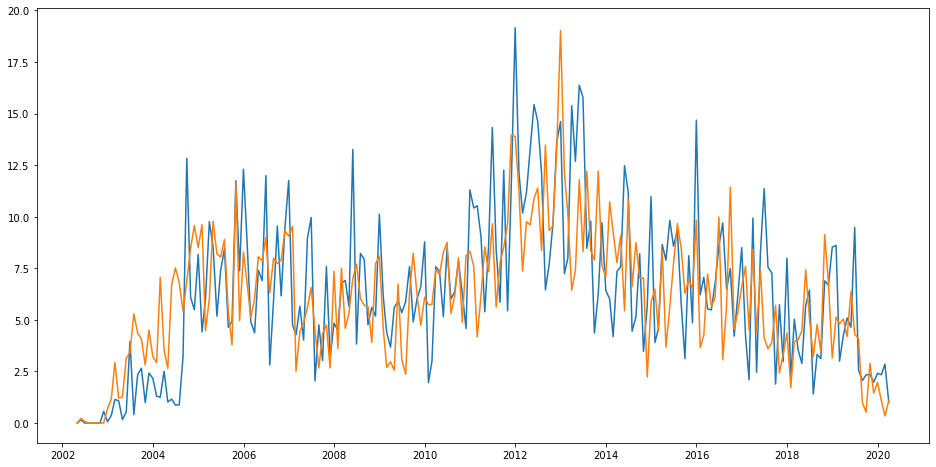

In [17]:
topics3 = ['Credit Agreement', 'Sale of Assets']
fig, ax = plt.subplots(figsize = (16,8))
for topic in topics3:
    x = df_topics_aggmonth.index
    y = df_topics_aggmonth[topic]
    ax.plot(x, y, label=topic)
# plt.xlim((df_topics_aggmonth.index.year(2003), df_topics_aggmonth.index.year(2019)))
# ax.legend(fontsize=12)
# plt.xlabel('Year', fontsize=18)
# plt.ylabel('Topic Prevalence', fontsize=18)
# plt.title('Time Series of Borrowing Events, 2003-2019', fontsize=20)
plt.show()